<a href="https://colab.research.google.com/github/raykil/PY580-Machine-Learning/blob/main/NB_ML_is_difficult.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Notebook 1: Why is Machine Learning difficult?

## Overview 

In this notebook, we will get our hands dirty trying to gain intuition about why machine learning is difficult. 

Our task is going to be a simple one, fitting data with polynomials of different order. Formally, this goes under the name of polynomial regression. Here we will do a series of exercises that are intended to give the reader intuition about the major challenges that any machine learning algorithm faces.

## Learning Goal

We will explore how our ability to predict depends on the number of data points we have, the "noise" in the data, and our knowledge about relevant features. The goal is to build intuition about why prediction is difficult and discuss general strategies for overcoming these difficulties.


## The Prediction Problem

Consider a probabilistic process that gives rise to labeled data $(x,y)$. The data is generated by drawing samples from the equation
$$
    y_i= f(x_i) + \eta_i,
$$
where $f(x_i)$ is some fixed, but (possibly unknown) function, and $\eta_i$ is a Gaussian, uncorrelate noise variable such that
$$
\langle \eta_i \rangle=0 \\
\langle \eta_i \eta_j \rangle = \delta_{ij} \sigma
$$
We will refer to the $f(x_i)$ as the **true features** used to generate the data. 

To make prediction, we will consider a family of functions $g_\alpha(x;\theta_\alpha)$ that depend on some parameters $\theta_\alpha$. These functions respresent the **model class** that we are using to try to model the data and make predictions. The $g_\alpha(x;\theta_\alpha)$ encode the class of **features** we are using to represent the data.

To learn the parameters $\boldsymbol{\theta}$, we will train our models on a **training data set** and then test the effectiveness of the model on a <i>different</i> dataset, the **test data set**. The reason we must divide our data into a training and test dataset is that the point of machine learning is to make accurate predictions about new data we have not seen. As we will see below, models that give the best fit to the training data do not necessarily make the best predictions on the test data. This will be a running theme that we will encounter repeatedly in machine learning.  


For the remainder of the notebook, we will focus on polynomial regression. Our task is to model the data with polynomials and make predictions about the new data that we have not seen.
We will consider two qualitatively distinct situations: 
<ul>
<li> In the first case, the process that generates the underlying data is in the model class we are using to make predictions. For polynomial regression, this means that the functions $f(x_i)$ are themselves polynomials.
<li>In the second case, our data lies outside our model class. In the case of polynomial regression, this could correspond to the case where the $f(x_i)$ is a 10-th order polynomial but $g_\alpha(x;\theta_\alpha)$ are polynomials of order 1 or 3.
</ul>

In the exercises and discussion we consider 3 model classes:
<ul>
<li> the case where the $g_\alpha(x;\theta_\alpha)$ are all polynomials up to order 1 (linear models),
<li> the case where the $g_\alpha(x;\theta_\alpha)$ are all polynomials up to order 3,
<li> the case where the $g_\alpha(x;\theta_\alpha)$ are all polynomials up to order 10.
</ul>

To measure our ability to predict, we will learn our parameters by fitting our training dataset and then making predictions on our test data set. One common measure of predictive  performance of our algorithm is to compare the predictions,$\{y_j^\mathrm{pred}\}$, to the true values $\{y_j\}$. A commonly employed measure for this is the sum of the mean square-error (MSE) on the test set:
$$
MSE= \frac{1}{N_\mathrm{test}}\sum_{j=1}^{N_\mathrm{test}} (y_j^\mathrm{pred}-y_j)^2
$$
We will return to this in later notebooks. For now, we will try to get a qualitative picture by examining plots on test and training data.

## Fitting vs. predicting when the data is in the model class


We start by considering the case:
$$
f(x)=2x.
$$
Then the data is clearly generated by a model that is contained within all three model classes we are using to make predictions (linear models, third order polynomials, and tenth order polynomials). 


Run the code for the following cases:
<ul> 

<li> For $f(x)=2x$, $N_{\mathrm{train}}=10$ and $\sigma=0$ (noiseless case), train the three classes of models (linear, third-order polynomial, and tenth order polynomial) for a training set when $x_i  \in [0,1]$. Make graphs comparing fits for different order of polynomials. Which model fits the data the best?
<br>
<font color=#2E86C1>
In the noiseless case, the data is generateed perfectly linearly. Therefore, all three models (linear, 3rd order, and 10th order) all fit the data equally and the best.
</font>
<br>
<br>

<li> Do you think that the data that has the least error on the training set will also make the best predictions? Why or why not? Can you try to discuss and formalize your intuition? What can go right and what can go wrong?
<br>
<font color=#2E86C1>
   In general, the data that has the least error on the training set will NOT make the best predictions. Data in real life has noise, and choosing a model with high complexity may capture noise as a trend and result in overfitting. With finite amount of data, simple models may be better at predicting because of bias-variance tradeoff.
</font>
<br><br>

<li>Check your answer by seeing how well your fits predict newly generated test data (including on data outside the range you fit on, for example $x \in [0,1.2]$) using the code below. How well do you do on points in the range of $x$ where you trained the model? How about points outside the original training data set? 
<br>
<font color=#2E86C1>
In noiseless case, there will be no unpredictability even in the range outside the training dataset. Thus, the models will perfectly predict the test data. This will not be the case when noise is introduced.
</font>
<br><br>

<li>Repeat the exercises above for $f(x)=2x$, $N_{\mathrm{train}}=10$, and $\sigma=1$. What changes?
<br>
<font color=#2E86C1>
Since $N_{\text{train}}$ is 10 in this case, no matter how much noise intervenes, the 10th order polynomial perfectly fits the training set. Linear and 3rd order models do not perform as good as the 10th order polynomial. However, when we predict, we see that the 10th order polynomial gives very poor performace beyond the training set range. Rather, linear and 3rd order polynomials predict better than 10th order polynoimal. This is becasue of overfitting. 10th order polynomial interprets noise as a pattern and extrapolate it to the range $x>1.0$.
</font>
<br><br>

<li>Repeat the exercises above for $f(x)=2x$, $N_{\mathrm{train}}=100$, and $\sigma=1$. What changes?
<br>
<font color=#2E86C1>
Now the 10th order polynomial captures that at $x>1.2$, the data tends to increase. However, still linear and 3rd order polynomials outperform the 10th order polynomial.
</font>
<br><br>

<li> Summarize what you have learned about the relationship between model complexity (number of parameters), goodness of fit on training data, and the ability to predict well.
<br>
<font color=#2E86C1>
Having high model complexity does not necessarily mean that the model is better and predicting, although it may perform better at fitting. The important lesson is that fitting well does not guarantee predicting.
</font>
</ul>


## Fitting vs. predicting when the data is not in the model class
Thus far, we have considered the case where the data is generated using a model contained in the model class. Now consider  $f(x)=2x-10x^5+15x^{10}$. *Notice that the for linear and third-order polynomial the true model $f(x)$ is not contained in model class $g_\alpha(x)$* .

<ul>
<li> Repeat the exercises above fitting and predicting for $f(x)=2x-10x^5+15x^{10}$ for $N_{\mathrm{train}}=10,100$ and $\sigma=0,1$. Record your observations.
<br>
<font color=#2E86C1>
In the noiseless case, 10th order polynomial gives exact result in fitting and predicting. 10th order polynomial performs better (as expected) than the linear or 3rd order polynomials. In $\sigma=1$ case, 10th order polynomial closely predicts the data lying in $x>1.0$ region. 3rd order polynomial predicts the increase in data beyond the training range, but does not capture the increasing curve as good as the 10th order polynomial case.
</font>
<br><br>

<li> Do better fits lead to better predictions?
<br>
<font color=#2E86C1>
In case of 10th order data generation, better fitting (which is done by 10th order model) lead to better predictions (also done by 10th order polynomial).
</font>
<br><br>

<li> What is the relationship between the true model for generating the data and the model class that has the most predictive power? How is this related to the model complexity? How does this depend on the number of data points $N_{\mathrm{train}}$ and $\sigma$?
<br>
<font color=#2E86C1>
If the true model is not as complex as the model class, the complex model may overfit the data. If the model class is not as complex as the true model, the model may not be able to capture the true trend enough, failing to accurately predicting. If the training dataset is too small, even the model with suitably chosen complexity may interpret noise as meaningful trend, so we also need a reasonable amount of training data set. 
</font>
<br><br>
<li> Summarize what you think you learned about the relationship of knowing the true model class and predictive power.
<br>
<font color=#2E86C1>
Suitable model class must be chosen to correctly predict the true model class. The training dataset must also be not too small, so that noise is suppressed. Choosing low complexity reduces the variance, but increases the bias, and vice versa. Due to this bias-variance tradeoff, we should devise a method to sysyematically choose the complexity of a model.
</font>
<br><br>


# Training the models:

In [19]:
# This is Python Notebook to walk through polynomial regression examples
# We will use this to think about regression
import numpy as np
%matplotlib inline

from sklearn import datasets, linear_model
from sklearn.preprocessing import PolynomialFeatures

from matplotlib import pyplot as plt, rcParams

In [29]:
# Training Data
N_train     = 100
sigma_train = 1

x = np.linspace(0.05,0.95,N_train)        # Train on integers (x-coordiante of training data)
s = sigma_train*np.random.randn(N_train)  # Gaussian random noise

# Data generation function
y = 2*x+s                     #linear

In [30]:
# Linear Regression
clf = linear_model.LinearRegression()
clf.fit(x[:, np.newaxis], y)           # Note: sklearn requires a design matrix of shape (N_train, N_features). Thus we reshape x to (N_train, 1)

# 3rd order regression
poly3 = PolynomialFeatures(degree=3)
X3    = poly3.fit_transform(x[:,np.newaxis])
clf3  = linear_model.LinearRegression()
clf3.fit(X3,y)

# 10th order regression
poly10 = PolynomialFeatures(degree=10)
X10    = poly10.fit_transform(x[:,np.newaxis])
clf10  = linear_model.LinearRegression()
clf10.fit(X10,y)

LinearRegression()

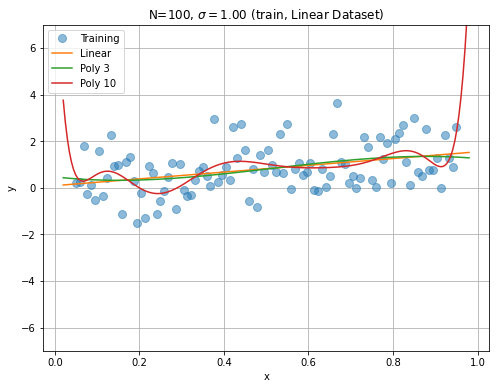

In [31]:
# Plotting

# Training dataset
fig = plt.figure(figsize=(8, 6))
p1  = plt.plot(x, y, "o", ms=8, alpha=0.5, label='Training')

# Linear order
xplot       = np.linspace(0.02,0.98,200) # grid of points, some are in the training set, some are not
linear_plot = plt.plot(xplot, clf.predict(xplot[:, np.newaxis]), label='Linear')

# 3rd order
X3plot     = poly3.fit_transform(xplot[:,np.newaxis])
poly3_plot = plt.plot(xplot, clf3.predict(X3plot), label='Poly 3')

# 10th order
X10plot     = poly10.fit_transform(xplot[:,np.newaxis])
poly10_plot = plt.plot(xplot, clf10.predict(X10plot), label='Poly 10')


plt.legend(loc='best')
plt.ylim([-7,7])
plt.xlabel("x")
plt.ylabel("y")
Title="N=%i, $\sigma=%.2f$"%(N_train,sigma_train)
plt.title(Title+" (train, Linear Dataset)")
filename_train = "train-linear_N=%i_noise=%.2f.pdf"%(N_train, sigma_train)
plt.savefig(filename_train)
plt.grid()
plt.show()

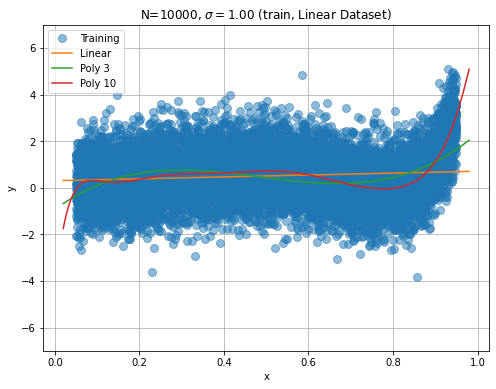

In [44]:
# Same thing for 10th order dataset
N_train     = 10000
sigma_train = 1

x = np.linspace(0.05,0.95,N_train)
s = sigma_train*np.random.randn(N_train)
y = 2*x-10*x**5+15*x**10+s

# Regressions
clf = linear_model.LinearRegression()
clf.fit(x[:, np.newaxis], y)

poly3 = PolynomialFeatures(degree=3)
X3    = poly3.fit_transform(x[:,np.newaxis])
clf3  = linear_model.LinearRegression()
clf3.fit(X3,y)

poly10 = PolynomialFeatures(degree=10)
X10    = poly10.fit_transform(x[:,np.newaxis])
clf10  = linear_model.LinearRegression()
clf10.fit(X10,y)

# Plottings
fig = plt.figure(figsize=(8, 6))
p1  = plt.plot(x, y, "o", ms=8, alpha=0.5, label='Training')

xplot       = np.linspace(0.02,0.98,200)
linear_plot = plt.plot(xplot, clf.predict(xplot[:, np.newaxis]), label='Linear')

X3plot     = poly3.fit_transform(xplot[:,np.newaxis])
poly3_plot = plt.plot(xplot, clf3.predict(X3plot), label='Poly 3')

X10plot     = poly10.fit_transform(xplot[:,np.newaxis])
poly10_plot = plt.plot(xplot, clf10.predict(X10plot), label='Poly 10')

plt.legend(loc='best')
plt.ylim([-7,7])
plt.xlabel("x")
plt.ylabel("y")
Title="N=%i, $\sigma=%.2f$"%(N_train,sigma_train)
plt.title(Title+" (train, Linear Dataset)")
filename_train = "train-o10_N=%i_noise=%.2f.pdf"%(N_train, sigma_train)
plt.savefig(filename_train)
plt.grid()
plt.show()

# Testing the fitted models

In [51]:
# Generating test data 
N_test     = 20
sigma_test = sigma_train
print(sigma_test)

max_x  = 1.2
x_test = max_x*np.random.random(N_test)      # Some points will be drawn outside the training interval
s_test = sigma_test*np.random.randn(N_test)  # Random Gaussian noise

#y_test=2*x_test+s_test                              # Linear
y_test=2*x_test-10*x_test**5+15*x_test**10+s_test  # Tenth order

# Design matrices for prediction
x_plot = np.linspace(0,max_x, 200)
X3     = poly3.fit_transform(x_plot[:,np.newaxis])
X10    = poly10.fit_transform(x_plot[:,np.newaxis])

1


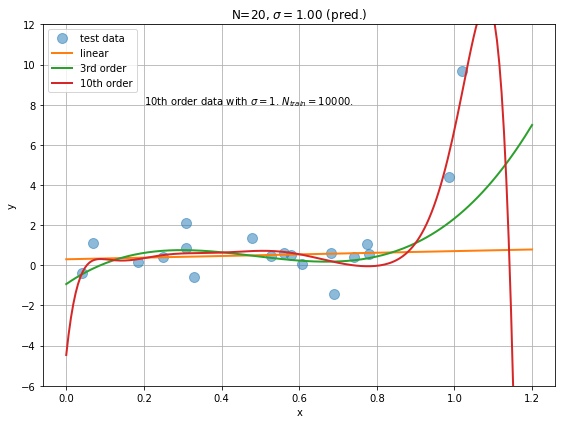

In [52]:
############## PLOTTING RESULTS ##########

fig = plt.figure(figsize=(8, 6))

p1  = plt.plot(x_test, y_test, 'o', ms=10, alpha=0.5, label='test data')
p2  = plt.plot(x_plot,clf.predict(x_plot[:,np.newaxis]), lw=2, label='linear')
p3  = plt.plot(x_plot,clf3.predict(X3), lw=2, label='3rd order')
p10 = plt.plot(x_plot,clf10.predict(X10), lw=2, label='10th order')


plt.legend(loc='best')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best')
Title="N=%i, $\sigma=%.2f$"%(N_test,sigma_test)
plt.title(Title+" (pred.)")
plt.tight_layout()
plt.ylim((-6,12))
plt.text(0.2,8.0,"10th order data with $\sigma=1$. $N_{train} = 10000$.", wrap=True)

# Linear Filename
filename_test="pred-linear_N=%i_noise=%.2f.pdf"%(N_test, sigma_test)

# Tenth Order Filename
#filename_test=Title+"pred-o10.pdf"

# Saving figure and showing results
plt.savefig(filename_test)
plt.grid()
plt.show()